# Lab 3: Strain Gauge

In this lab, a strain gauge was created using a Wheatstone bridge. Calibration measurements were taking using known masses and one unknown mass was measured.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sympy

## Hardware Setup
A strain gauge was epoxied to a metal rod to measure deflection. The rod was clamped onto a table, and the weight was hung off the end of the rod. 

A Wheatstone bridge was constructed to precisely measure the resistance across the strain gauge, which changes based on the load on the rod. The Wheatstone bridge outputs a voltage differential which is amplified using a voltage amplifier. This allows the small changes in resistance to be read at a higher sensitivity by the analog discovery.

## Raw Data

Five calibration data points were taken with known weights, and the mass and voltage was recorded here. A sixth weight was taken of an unknown mass which will be calculated.

In [2]:
# Raw Data
# Calibration data in (mass (g), voltage (V))
calibration_data = [
    (0, 0.001),
    (8.7, 0.051),
    (20.4, 0.092),
    (47.3, 0.16),
    (72.1, 0.25),
]

calibration_data_df = pd.DataFrame(calibration_data)
calibration_data_df.columns = ['Mass', 'Voltage']
calibration_data_df.set_index('Voltage', inplace=True)

unknown = 0.27

### Data Analysis

The calibration data is fairly linear, so the mass of the weight can be modeled with a simple linear gain from the voltage. The voltage was also calibrated using a potentiometer to have a 0V differential when the mass is 0.

Text(0, 0.5, 'Mass (g)')

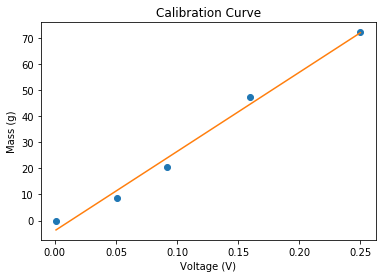

In [3]:
# Generate Linear Regression and plot
cal = np.poly1d(np.polyfit(x=calibration_data_df.index, y=calibration_data_df['Mass'], deg=1))
calibration_data_df['trendline'] = cal(calibration_data_df.index)
ax = plt.plot(calibration_data_df.index, calibration_data_df['Mass'], 'o')
ax = plt.plot(calibration_data_df.index, calibration_data_df['trendline'], '-')
plt.title('Calibration Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Mass (g)')

### Calculate the unknown mass

Using this linear fit, the mass of the unknown object can be calculated. Unfortunately, because the voltage is out of range, this is an extrapolation, which may be less accurate than a value that is interpolated for. Realistically, the calibration values should span the entire range of the sensor, and the unknown values should be within this range.

In [4]:
# Calculate value of unknown mass
cal(unknown)

77.98610478842225

## Scale Sensitivity
Scale sensitivity is defined as $$ dV_{output} \over {dmass_{input}} $$

The scale sensitivity is the derivative of the calibration curve. Because the calibration curve is linear, the sensitivity is simply the slope of the line.

In [5]:
# Get the scale sensitivity
sensitivity = np.polyfit(x=calibration_data_df.index, y=calibration_data_df['Mass'], deg=1)[0]
print("Scale Sensitivity: {} V/g".format(round(sensitivity, 2)))

Scale Sensitivity: 303.3 V/g


## 20mV change in resistance

Given a $\Delta V$ of 20mV, calculate the change in electrical resistance and the mass applied to get this change.

$$ \Delta V = {R_{sense} \over {R_{const} + R_{sense}}} $$
$$ 20 mV = {\Delta R \over {121 \Omega + \Delta R}} $$

In [6]:
# Change in resistance

dr = sympy.Symbol('\Delta R')
dv = 0.020 # V
r = 121  # ohm
sympy.solve(dr / (r + dr) - dv, dr)

[2.46938775510204]

In [7]:
# Change in voltage
# Generate inverse calibration curve
inv_cal = np.poly1d(np.polyfit(x=calibration_data_df['Mass'], y=calibration_data_df.index, deg=1))
# Calculate mass for dV of 20 mV
print("Mass added: {} g".format(round(inv_cal(dv), 4)))

Mass added: 0.0141 g
